<h1>1- Introduction</h1>

Le clustering consiste en un regroupement (partitionnement) des objets en des groupes (paquets) homogènes (clusters). Un cluster est une collection d’objets (éléments) qui partagent des caractéristiques communes ou trop proches et qui sont dissimilaires aux objets des autres clusters. Le clustering consiste en un regroupement (partitionnement) des objets en des groupes (paquets) homogènes (clusters).
Un cluster est une collection d’objets (éléments) qui partagent des caractéristiques communes ou trop proches et qui sont dissimilaires aux objets des autres clusters.

Les applications du clustering peuvent être répertoriées en 3 catégories :

Segmentation des bases de données (d’images) en des catégories d’images ; images représentants les forêts, champs, voitures, bâtiments, lacs, …
Classification non supervisée
Extraction de connaissances afin de faire apparaitre des sous-ensembles et sous-concepts éventuellement impossibles à distinguer naturellement.*texte en italique*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<h1>2- Algorithmes de clustering</h1>
Il existe une multitude d’algorithmes de clustering qui peuvent être utilisés dans le cas de l’Image mining :

1- Les méthodes basées centroïdes telles que les algorithmes des k-moyennes (K-means) ou k-médoïdes
2- Les méthodes de regroupement hiérarchique
3- Algorithme de maximisation de l'espérance (Expectation-Maximization; EM)
5- Algorithme de C-moyennes floues (Fuzzy C-means clustering; FCM)
…

<h2>2.1- K-means </h2>
K-means est l'un des algorithmes les plus connus en classification non supervisée (clustering), simple et largement utilisé.

Principe

• C’est algorithme itératif qui minimise la somme des distances entre chaque pixel et le centroïde de son cluster
• Consiste à regrouper les pixels en un certain nombre de classes représentant les régions
• Le nombre de classes (K) est choisi selon une connaissance préalable et suivant combien de régions souhaitées
• Le critère d’arrêt de l’algorithme est basé sur la stabilité des moyennes

Avantages
1- L’algorithme de k-Means est très populaire du fait qu’il est très facile à comprendre et à mettre en œuvre,
2- La méthode résous une tâche non supervisée, donc elle ne nécessite aucune information sur les données, <
3- Rapidité et faibles exigences en taille mémoire,
4- La méthode est applicable à tout type de données en choisissant une bonne notion de distance.

Inconvénients
1- Le nombre de classes est un paramètre de l’algorithme,
2- Un bon choix du nombre k est nécessaire, car un mauvais choix de k produit de mauvais résultats,
3- Les points isolés sont mal gérés (Ils doivent appartenir obligatoirement à un cluster ?)  très sensible au bruit,
4- L'algorithme du K-Means ne trouve pas nécessairement la configuration la plus optimale correspondant à la fonction objective minimale,
5- Les résultats de l'algorithme du K-Means sont sensibles à l'initialisation aléatoires des centres.

Algorihtme
1- Choix aléatoire de la position initiale des K centroïdes de clusters,
2- Affecter les pixels à un cluster suivant un critère de minimisation des distances (généralement selon une mesure de distance euclidienne),
3- Une fois tous les pixels placés, recalculer les centroïdes de chaque cluster,
4- Réitérer les étapes 2 et 3 jusqu’à ce que plus aucune réaffectation ne soit possible.

<h2>2.2- FCM (Fuzzy C-Means; C-moyennes floues) </h2>
FCM est un algorithme de classification non-supervisée floue. Son principe est le suivant:

Un pixel peut appartenir à plusieurs classes mais selon le degré d’appartenance,
Chaque degré exprime l’appartenance incertaine d’un pixel à une région donnée,
Le degré d’appartenance se situe dans l’intervalle [0, 1] et les classes obtenues ne sont pas forcément disjointes.
Avantages
1- Non-supervisé
2- Converge toujours

Inconvénients
1- Le principal inconvénient de ces méthodes réside dans le fait que la classification ne repose que sur l’intensité des éléments de volume sans prendre en compte l’information spatiale, ce qui la rend sensible au bruit et a l’hétérogénéité d’intensité,
2- Longue durée de calcule,
4- Sensibilité a la conjecture initiale (vitesse, minimums locaux,bruit).

Algorithme
1- Fixer les paramètres : C : le nombre de classes, m: degré de flou, ε : critère d’arrêt,
2- Initialiser la matrice de degrés d’appartenance U par des valeurs aléatoires dans l’intervalle [0,1],
3- Calculer les centroïdes des classes,
4- Mettre à jour la matrice degrés d’appartenance suivant la position des centroïdes,
5- Répéter les étapes 3 à 4 jusqu’à satisfaction du critère d’arrêt.

<h2>2.3- Expectation Maximisation (EM) </h2>
L'Expectation Maximisation (EM) est utilisé pour trouver l’estimation du maximum de vraisemblance à partir d’un ensemble de données. Le choix initial des paramètres affecte le déroulement de la classification jusqu’à générer des clusters incohérents.

Algorithme
1- Initialisation : Choisir des paramètres initiaux :

μj : la moyenne de chaque cluster,
σ : la variance ,
P(Cj) : la proportion de chaque classe.

2- Étape E : Estimer la probabilité que le vecteur x des pixels appartient à un cluster,
3- Étape M: Mise à jour les paramètres,
4- Répéter l'itération de base, jusqu'à stabilisation des paramètres.

<h2>2.4- Mean-Shift </h2>
Le Mean-Shift est une méthode de clustering basée sur l’estimation de densité.

Principe
Chaque pixel est représenté par un point dans l’espace à N dimensions pour ce faire, on calcule la densité locale en un point et on déplace itérativement la fenêtre en direction du gradient de densité maximum.
Algorithme
1- Choisir une répartition uniforme des fenêtres de recherche initiales,
2- Calculer le centroide des données pour chaque fenêtre,
3- Centrer la fenêtre de recherche sur le centroide de l'étape 2,
4- Répéter les étapes 2 et 3 jusqu'un à convergence,
5- Fusionner les fenêtres se trouvant au même point final,
6- Grouper les données traversées par les fenêtres fusionnées.

Double-cliquez (ou appuyez sur Entrée) pour modifier

<h1>3- Implémentation </h1> 
En ImageMining, nous avons deux façons pour appliquer (utiliser) le Clustering.

Regrouper une base d’images en des sous-ensembles. Par exemple, nous avons une base d'image contenant une multitude de types d'images; images aériennes, images des animaux, images des vehicules, ... et on veut regrouper chacune des images de la base dans sa catégoorie.
Segmenter des images.
Dans cet atelier, nous allons tout d'abord faire le clustering de deux bases d'images

Images à regrouper en 2 classes
Image à regrouper en 4 classes
Le resultats du clustering sera enregistré dans un fichier *.csv en respectant la forme suivante:

image_name,class image1.jpg,1 image2.jpg,2 image3.jpg,1

Par la suite nous allons segmenter des images utilisant un algorithme de clustering et aussi nous allons appliquer la classification supervisée pour la segmentation d'images.

In [ ]:
import cv2
# Variables globales 
# color_Moments 6 
def color_Moments(img):
  colorFeatures=[]
  r=img[1,:,:]
  g=img[2,:,:]
  b=img[3,:,:]
  colorFeatures.append(np.mean(r))
  colorFeatures.append(np.mean(g))
  colorFeatures.append(np.mean(b))
  colorFeatures.append(np.std(r))
  colorFeatures.append(np.std(g))
  colorFeatures.append(np.std(b))
  colorFeatures = colorFeatures/np.mean(colorFeatures)
  return colorFeatures


# hsvHistogramFeatures 32
def vect_desc_his(img):
  vercteurDiscriptive = []
  imgHsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  img_h = imgHsv[:,:,0]
  img_s = imgHsv[:,:,1]
  img_v = imgHsv[:,:,2] 
  hist_h = cv2.calcHist([img_h],[0],None, [8],[0,256])
  hist_s = cv2.calcHist([img_s],[0],None, [2],[0,256])
  hist_v = cv2.calcHist([img_v],[0],None, [2],[0,256])
  for i in range(8):
     vercteurDiscriptive.append(hist_h[i][0])
     for i in range(2):
       vercteurDiscriptive.append(hist_s[i][0])
     for i in range(2):
        vercteurDiscriptive.append(hist_v[i][0])
  return vercteurDiscriptive


# textureFeatures 4 parmi les meilleurs
from skimage.feature import greycomatrix ,greycoprops
def textureGLCM(img):
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  GLCM = greycomatrix(img_gray,[1],[0])
  energy = greycoprops(GLCM,'energy')[0]
  contrast = greycoprops(GLCM,'contrast')[0]
  correlation = greycoprops(GLCM,'correlation')[0]
  homogeneity = greycoprops(GLCM,'homogeneity')[0]
  glcm =[energy[0],contrast[0],correlation[0],homogeneity[0]]
  return glcm


# shapeFeatures 7 
def HuMoments(img):
    # If image is not a single channel image convert it
    if len(img.shape) != 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.moments(img)
    hu_moments = cv2.HuMoments(img).flatten()
    return hu_moments


# lbp_histogram 32 Local Binary Pattern descripteur de texture

from skimage import feature
import numpy as np

class LocalBinaryPatterns:
  def __init__(self, numPoints, radius):
		# stocker le nombre de points et le rayon
    self.numPoints = numPoints
    self.radius = radius
  def describe(self, image, eps=1e-7):
  	# calcule la représentation du modèle binaire local
	  # de l'image, puis utilisez la représentation LBP
	  # pour construire l'histogramme des motifs
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints + 3), range=(0, self.numPoints + 2))
	  # normaliser l'histogramme
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
	  # renvoie l'histogramme des modèles binaires locaux
    return hist

# Pour le dossier
path="/content/drive/MyDrive/Image Mining/DB_Clustering/" 

# Pour 2 Classes
path2="/content/drive/MyDrive/Image Mining/DB_Clustering/2Classes/" 

# Pour 4 Classes 
path4="/content/drive/MyDrive/Image Mining/DB_Clustering/4Classes/" 

 Pour coder LBP, le niveau de gris de chaque pixel est comparé à ceux de ses voisins et les résultats de ces comparaisons sont ensuite pondérés et sommés. Le descripteur de texture obtenu est l'histogramme LBP dont la taille dépend du nombre de voisins.

<h1>l’extraction de caractéristiques<h1>

In [ ]:
def getFeatures(img):
  # color_Moments
  color_m = color_Moments(img)
  # vect_desc_his
  His = vect_desc_his(img)
  #texture glcm 
  texture_glcm = textureGLCM(img)
  # form (shape ) Hu
  hu_m =HuMoments(img)
  # lbp_histogram 32
  lpb_hist = LocalBinaryPatterns(23,8)
  lbp = lpb_hist.describe(img)

  get_features = np.array([]) 
  get_features = np.concatenate((color_m,His,texture_glcm,hu_m,lbp))
  return get_features

from os import listdir
from matplotlib import image
loaded_images = []
names =[]
object = {}
for filename in listdir(path):
  for file in listdir(path+filename):
    object[file]=filename
    image_data = image.imread(path+filename+"/"+file)
    names.append(filename)
    loaded_images.append(image_data)
print(np.array(loaded_images).shape)

def CBIR_Indexation():
  features = []
  for i in range (len(loaded_images)):
     features.append(getFeatures(loaded_images[i]))
     vect = np.array(features)
  return vect

index_Matrix=CBIR_Indexation()
print(index_Matrix.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


(600,)
(600, 82)


In [ ]:
import os
import cv2
def createFeatures(dataset_path):
  """
  Input: dataset_path: nom du dossier contenant les images par dossier (classe)
  Outpurs:
  features: Matrice de caractéristiques de taille (nombre_d_image x nombre_features)
  image_names: Vecteur retournant les noms des images de la base. 
  """
  image_names=[]
  features = []
  dirs = os.listdir(dataset_path)
  dirs.sort()
  for image_name in dirs:
    image_path = dataset_path + "/" + image_name
    image = cv2.imread(image_path)
    feature = getFeatures(image)
    features.append(feature)
    image_names.append(image_name)
  return features, image_names

In [ ]:
features, image_names=createFeatures(path2)

Vecteur descripteur

In [ ]:
print(np.array(features).shape)

(200, 82)


<h1>3.1.2 Clustering avec le Kmeans<h1>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", n_init=100, init='random')
img_features = QuantileTransformer(n_quantiles=10).fit_transform(features)
kmeans.fit(img_features)
print(kmeans.labels_)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
import pandas as pd
def importToCsv(imgNm, pred_lbl, file_name):
  data = {'image_name': imgNm,
          'Class': pred_lbl
          }
  df = pd.DataFrame(data, columns= ['image_name', 'Class'])
  df.to_csv (file_name, index = False, header=True)

In [ ]:
importToCsv(image_names, kmeans.labels_,'/content/drive/MyDrive/Image Mining/Cluster_Kmeans2.csv')

<h1>3.1.2- KMedoids<h1>

In [ ]:
# Il faut installer scikit-learn-extra pour pouvoir utiliser KMedoids
#!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
kmedoids.fit(features)
print(kmedoids.labels_)

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1
 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0]


In [ ]:
importToCsv(image_names, kmedoids.labels_,'/content/drive/MyDrive/Image Mining/cluster_KMedoids.csv')

<h1>3.1.3- Clustering Hierarchique

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc_agg = AgglomerativeClustering(n_clusters=n_clusters)
hc_agg.fit(features)
print(hc_agg.labels_)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1]


In [ ]:
importToCsv(image_names, hc_agg.labels_,'/content/drive/MyDrive/Image Mining/cluster_Hierarchical.csv')

<h1>3.1.4 FCM</h1>
Un pixel peut appartenir à plusieurs classes mais selon le degré d’appartenance

In [ ]:
#pip install -U scikit-fuzzy
#import skfuzzy as fuzz
#!pip install fuzzy-c-means
from fcmeans import FCM
fcm = FCM(n_clusters=n_clusters)
fcm.fit(np.array(features))
fcm_labels = fcm.predict(np.array(features))
print(fcm_labels)

[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1
 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]


In [ ]:
importToCsv(image_names, fcm_labels,'/content/drive/MyDrive/Image Mining/cluster_FCM.csv')

<h1>Clustering en 4 classes

In [ ]:
# Extraction des caractéristiques
features, image_names=createFeatures(path4)

# Clusetring
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer
n_clusters=4
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", n_init=100, init='random')
img_features = QuantileTransformer(n_quantiles=10).fit_transform(features)
kmeans.fit(img_features)
print(kmeans.labels_)

# Importation du résultat
importToCsv(image_names, kmeans.labels_,'/content/drive/MyDrive/Image Mining/cluster_Kmeans4C.csv')


[1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 0 1 3 1 0 3 3 1 1 1 1 1 3 3 1 0 2 1 2 1 1 3 1 3 3 3 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 0 0 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 3 3
 3 0 0 0 0 0 3 0 0 0 0 0 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3
 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


<h1>3.3- Segmentation des images

(337, 336)
(113232,)


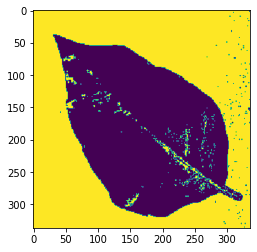

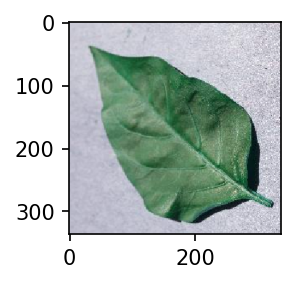

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
image_path="/content/drive/MyDrive/Image Mining/Image_clustering/1.bmp"
image=cv.imread(image_path)
img= cv.cvtColor(image, cv.COLOR_RGB2GRAY)
print(img.shape)
# Code pour aplatir de l'image: 2D => 1D
img_reshape= img.flatten()
print(img_reshape.shape)

# Appliquer le K-Means
#https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/
pixel_vals = np.float32(img_reshape)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 2
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
Mask = segmented_data.reshape((img.shape))

plt.imshow(Mask)
fig = plt.figure(figsize=(4, 4), dpi=150)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(image)

<h2>Segmenter l'image couleur dans l'espace RGB

(337, 336, 3)
[[206 206 218]
 [205 205 217]
 [205 205 217]
 ...
 [221 221 239]
 [221 221 239]
 [221 221 239]]


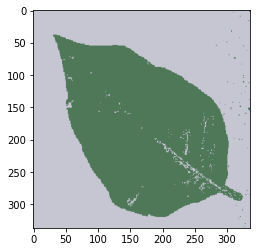

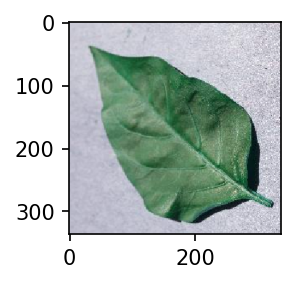

In [ ]:

image_path="/content/drive/MyDrive/Image Mining/Image_clustering/1.bmp"
image=cv.imread(image_path)
print(image.shape)
# Code pour aplatir de l'image: 3x2D => 3x1D
img_reshape=image.reshape(-1,3)
print(img_reshape)
# Appliquer le K-Means
#https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/
pixel_vals = np.float32(img_reshape)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 2
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# reshape data into the original image dimensions
Mask = segmented_data.reshape((image.shape))
plt.imshow(Mask)
fig = plt.figure(figsize=(4, 4), dpi=150)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(image)
#print(pixel_vals.shape)

<h1>3.3.1- Utilisant des caractéristiques extraites pour chaque pixel

<h4>Ce qui va nous permettre d'extraire 5 caractéristiques pour chaque pixel.

(337, 336)
(113232, 5)


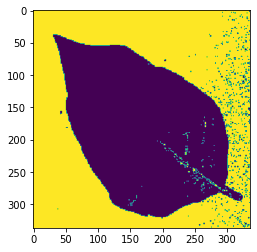

In [ ]:
import cv2 as cv
import numpy as np
from sklearn import preprocessing

# Extraction des caractéristiques
image_path="/content/drive/MyDrive/Image Mining/Image_clustering/1.bmp"
image=cv.imread(image_path)
img= cv.cvtColor(image, cv.COLOR_RGB2GRAY)
print(img.shape)

# Code pour aplatir de l'image: 2D => 1D
img_reshape=img.reshape(113232,)
img_reshape = np.float32(img_reshape)
#print(img_reshape.shape)

# Code pour extraires les caractéristiques de chaque pixel
#clasteringFeat=np.array(img_reshape)
clasteringFeat=np.zeros((113232,5))
clasteringFeat[:,0] = img_reshape 
clasteringFeat[:,1] = img_reshape - max(img_reshape)
clasteringFeat[:,2] = img_reshape - min(img_reshape)
clasteringFeat[:,3] = img_reshape - np.mean(img_reshape)
clasteringFeat[:,4] = img_reshape - np.std(img_reshape)

#print(np.array(clasteringFeat))
print(np.array(clasteringFeat).shape)

# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", n_init=100, init='random')
img_features = QuantileTransformer(n_quantiles=10).fit_transform(clasteringFeat)
kmeans.fit(img_features)
#print(clasteringFeat.shape)
#print(np.array(img_features).shape)
# Reconstruire le mask de segmentation 2D à partir des classes obtenues 1D
labels = kmeans.labels_
mask = labels.reshape(img.shape)
#Afficher le mask de segmentation obtenu
import matplotlib.pyplot as plt
plt.imshow(mask)

<h1>3.4- Segmentation d'images par classification supervisée

<h3>3.4.1- Extraction des caracteristiques

(113232, 6)


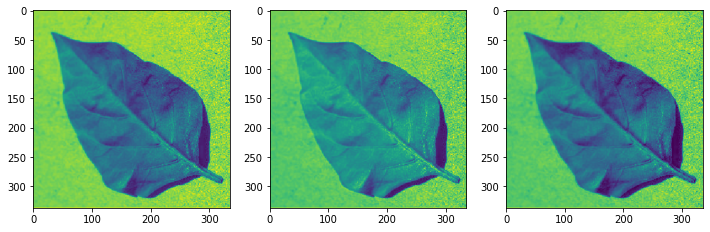

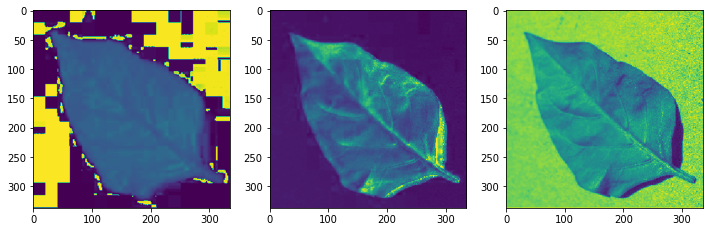

In [ ]:
import cv2 as cv
from matplotlib import cm
# Charger l'image originale

image_path="/content/drive/MyDrive/Image Mining/Image_clustering/1.bmp"
image=cv.imread(image_path)
# Features dans l'espace RGB
img_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)
red, green, blue = cv.split(img_rgb)
fig = plt.figure(figsize=(12,4))
axe1 = fig.add_subplot(131)
axe1.imshow(red)
axe2 = fig.add_subplot(132)
axe2.imshow(green)
axe3 = fig.add_subplot(133)
axe3.imshow(blue)      
# Features dans l'espace HSV
img_hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV)
hue,sat,val = cv.split(img_hsv)
fig2 = plt.figure(figsize=(12,4))
axe12 = fig2.add_subplot(131)
axe12.imshow(hue)
axe22 = fig2.add_subplot(132)
axe22.imshow(sat)
axe32 = fig2.add_subplot(133)
axe32.imshow(val)
#reshape des caracteristiques
red = red.reshape((113232,1))
green = green.reshape((113232,1))
blue = blue.reshape((113232,1))
sat = sat.reshape((113232,1))
val = val.reshape((113232,1))
hue = hue.reshape((113232,1))
#print(hue.shape)
# Concatener les caractéristiques dans une variable X
X = np.zeros((113232,6))
for i in range(113232):
  X[i]=np.concatenate((red[i],green[i],blue[i],sat[i],val[i],hue[i]))
#X =  np.concatenate((red,green,blue,hue,sat,val))
print(X.shape)

<h3>3.4.2- Création des étiquettes

(113232, 1)
(113232, 1)
(337, 336)


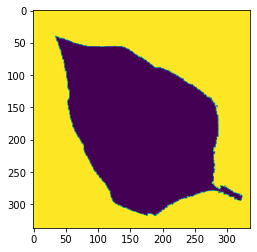

In [ ]:
import cv2 as cv
mask_path="/content/drive/MyDrive/Image Mining/Image_clustering/1_GT.bmp"
imageMask=cv.imread(mask_path, cv.IMREAD_GRAYSCALE)
plt.imshow(imageMask)
mask_reshape =imageMask.reshape((113232,1))

print(mask_reshape.shape)
# Concatener les etiquettes dans la variable Y
Y = np.zeros((mask_reshape.shape))

for i in range(mask_reshape.shape[0]):
  if(mask_reshape[i] != 0):
      Y[i] = 1
  
#print(Y)


print(np.array(Y).shape)
print(np.array(imageMask).shape)

In [ ]:
X.shape, Y.shape

((113232, 6), (113232, 1))

<h2>3.4.3- Entrainement et évaluation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix 
confusion_matrix(y_test, y_pred)
print(clf.score)
rapport=classification_report(y_test, y_pred)
# Afficher le rapport sous forme de tableau
print('Rapport de Classification : \n',rapport)
import sklearn.metrics as metrics
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro'))
print("recall : ", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1 score: ", metrics.f1_score(y_test, y_pred, average='macro'))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method ClassifierMixin.score of SVC()>
Rapport de Classification : 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14920
         1.0       1.00      0.98      0.99     22447

    accuracy                           0.99     37367
   macro avg       0.99      0.99      0.99     37367
weighted avg       0.99      0.99      0.99     37367

accuracy:  0.9881178580030509
precision:  0.9864605815395812
recall :  0.988918875454138
f1 score:  0.9876470489007386


<h3>3.4.4- Segmenter une nouvelle image

In [ ]:
image_path="/content/drive/MyDrive/Image Mining/Image_clustering/2.bmp"
image=cv.imread(image_path)
#plt.imshow(image)
# descirpteur: Intensités dans l'espace RGB
img_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)
red, green, blue = cv.split(img_rgb)

# descirpteur: Intensités dans l'espace HSV
img_hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV)
hue,sat,val = cv.split(img_hsv)

red = red.reshape((113232,1))
green = green.reshape((113232,1))
blue = blue.reshape((113232,1))
sat = sat.reshape((113232,1))
val = val.reshape((113232,1))
hue = hue.reshape((113232,1))
# Créer le vecteur descripteur Xnew


Xnew = np.zeros((113232,6))
for i in range(113232):
  Xnew[i]=np.concatenate((red[i],green[i],blue[i],sat[i],val[i],hue[i]))
print(Xnew.shape)


(113232, 6)


In [ ]:
y_new=clf.predict(Xnew)

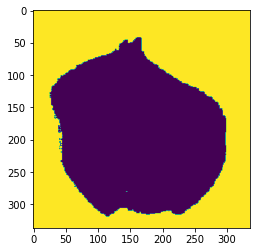

In [ ]:
# Reconstruire le masque de segmentation
mask = y_new.reshape((337,336))
plt.imshow(mask)

<h2>3.4.5- Evaluer le modéle

In [ ]:
mask_path_2GT="/content/drive/MyDrive/Image Mining/Image_clustering/2_GT.bmp"
imageMask_2GT=cv.imread(mask_path_2GT, cv.IMREAD_GRAYSCALE).ravel()//255
imageMask_2GT = imageMask_2GT.reshape(-1,1)
y_2GT =np.concatenate(imageMask_2GT)

confusion_matrix(y_2GT, Y)
rapport=classification_report(y_2GT, Y)
# Afficher le rapport sous forme de tableau
print('Rapport de Classification : \n',rapport)
import sklearn.metrics as metrics
print("accuracy: ", metrics.accuracy_score(y_2GT, Y))
print("precision: ", metrics.precision_score(y_2GT, Y, average='macro'))
print("recall : ", metrics.recall_score(y_2GT, Y, average='macro'))
print("f1 score: ", metrics.f1_score(y_2GT, Y, average='macro'))

Rapport de Classification : 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87     52426
           1       0.85      0.96      0.90     60806

    accuracy                           0.89    113232
   macro avg       0.90      0.88      0.89    113232
weighted avg       0.89      0.89      0.89    113232

accuracy:  0.8881323300833687
precision:  0.8967930236851847
recall :  0.8827706785787879
f1 score:  0.8859676455782695


<h2>3.4.6- Comparaison avec Kmeans

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import QuantileTransformer
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", n_init=100, init='random')
img_features = QuantileTransformer(n_quantiles=10).fit_transform(clasteringFeat)
kmeans.fit(X)

score = silhouette_score(X, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.596
